# Applying the Data Analysis Method to a Research Problem

# 1. Determine Research Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>


## 1.1. Big Five Personality Test Question-Trait  Correlation <a class="anchor" id="Title"></a>

## 1.2. Introduction <a class="anchor" id="Introduction"></a>
- The project is about the 2018 big 5 personality online test dataset.
https://www.kaggle.com/tunguz/big-five-personality-test
- The big five personality theory is the most trackable and consistant personality theory used in reasearch. The data set I will be using is one taken from a website called truity.
https://www.truity.com/test/big-five-personality-test

- Unfortunately I can only find out so much from the data I have been given as the test doesn't ask information such as jobs, hobbies, phobias, religion, ethnicity, physique, politics etc.

- Neither can it find the possible test scores of the people the test takers surround themselves with, which might have shown a correlation of similar or opposite scorers that are friends, family or in a relationship.

- It also is limited to people who care to take the test to begin with, which will likely scew the data in favour of people that are higher in traits of Openess due to a higher interest in more abstract topics. This is also shown in the average Openess score of all users that took the test being above 50% (Will be shown in the describe data section.)

- Even if all of these were accounted for there would be no way to confirm the validity of the information so we are left with largely anonymous data.

- On kaggle there has already been plenty of data analysis performed, such as compiling test results and showing the average scores per country.

## 1.3.Terminology and Key Words<a class="anchor" id="Terminology"></a>
- The Big Five personality model divides personality characteristics into 5 categories, Openess, Conscientiousness, Extraversion, Agreeableness and Neuroticism, also known as OCEAN.

- Openess measures creativity, openess to new experience, interest in the abstract and higher IQ scores.

- Conscientiousness measures worth ethic, industriousness, rule following, preperation, and orderliness.

- Extraversion measures an individual's time spent interacting with the external world as opposed to the internal.

- Agreeableness measures cooperation, trust, empathy and kindness.

- Neuroticism measures an individual's tendency to feel and be affected by negative emotion.

- Sources:

https://www.verywellmind.com/the-big-five-personality-dimensions-2795422

https://www.psychologytoday.com/us/basics/big-5-personality-traits

https://psychcentral.com/lib/the-big-five-personality-traits

## 1.2.Background <a class="anchor" id="Background"></a>
- Similar data analysis dataset done to find results per country:
https://www.kaggle.com/evgeniidorovskikh/big-5-personality-test-per-country-exploration

 ## 1.3 Research Questions <a class="anchor" id="Research Question"></a>

The primariy things I am trying to answer are:


- The test questions that impact the score of a specific trait but are least likely to be ticked as '5' (most accurate).

- The test questions that impact the score of a specific trait but are least likely to be ticked as '1' (least accurate).

- Are there any personality types that can be seen when gathered the results of a few thousand participants.

- What is the most commonly highly scored trait and the lowest?

-What are the results of each trait per person taking the test?

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>

In [ ]:
# Import Libraries Required
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Data source:
#Source Query location:
path = '/content/gdrive/My Drive/data-final.csv'
# reads the data from the file - denotes as CSV, it has no header, sets column headers
df = pd.read_csv(path, sep='\t+')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """


In [ ]:
df
#There are 50 questions in total with EXT marking extraversion, EST marking neuroticism,
#AGR marking agreeblenessm CNS marking conscientiousness and OPN marking openness.

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,4.0,2.0,4.0,4.0,4.0,2.0,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,...,1655.0,1937.0,1233.0,3151.0,2576.0,1888.0,2815.0,2964.0,2665.0,2888.0,3008.0,2367.0,2504.0,2544.0,2144.0,4784.0,3529.0,5072.0,2016.0,3353.0,2649.0,3544.0,7577.0,3096.0,1896.0,3912.0,2744.0,2025.0,1873.0,1232.0,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,5.0,3.0,3.0,5.0,3.0,3.0,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,...,2422.0,1448.0,3216.0,6160.0,2208.0,1513.0,2785.0,3833.0,3280.0,1184.0,2096.0,1880.0,3209.0,1744.0,4392.0,1943.0,2263.0,1559.0,1304.0,2176.0,2560.0,6632.0,2312.0,2376.0,2969.0,2271.0,4064.0,1144.0,2936.0,1615.0,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1

## 2.2 Describe Data <a class="anchor" id="Describedata"></a>


In [ ]:
df.columns

Index(['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9',
       'EXT10',
       ...
       'dateload', 'screenw', 'screenh', 'introelapse', 'testelapse',
       'endelapse', 'IPC', 'country', 'lat_appx_lots_of_err',
       'long_appx_lots_of_err'],
      dtype='object', length=110)

In [ ]:
df.shape

(1015341, 110)

In [ ]:
df.dtypes

EXT1                     float64
EXT2                     float64
EXT3                     float64
EXT4                     float64
EXT5                     float64
                          ...   
endelapse                  int64
IPC                        int64
country                   object
lat_appx_lots_of_err      object
long_appx_lots_of_err     object
Length: 110, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Columns: 110 entries, EXT1 to long_appx_lots_of_err
dtypes: float64(104), int64(2), object(4)
memory usage: 852.1+ MB


## 2.3 Verify Data Quality <a class="anchor" id="Verifydataquality"></a>


### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>


- Here is where I will find the top three question most frequently answered as '3'.

In [ ]:
neutral = df[df.columns[0:50]]
neutral[neutral==3].dropna().size
# The amount of neutral statements selected by everyone that took the test in the first 50 questions is 34150

34150

In [ ]:
four = df[df.columns[0:50]]
four[four==4].dropna().size

2250

In [ ]:
five = df[df.columns[0:50]]
five[five==5].dropna().size

27200

In [ ]:
two = df[df.columns[0:50]]
two[two==2].dropna().size

2950

In [ ]:
one = df[df.columns[0:50]]
one[one==1].dropna().size

17050

# 4. Modelling <a class="anchor" id="Modelling"></a>



In [ ]:
highest_ext = 0
lowest_ext = 10000000
test = 0
highest_overall = 0
lowest_overall = 10000000

for x in range(1,11):
  print('EXT' + str(x), 'has:', int(df[df['EXT' + str(x)]==5.0].loc[:,'EXT' + str(x)].value_counts()), '\n')
  test = df[df['EXT' + str(x)]==5.0].loc[:,'EXT' + str(x)].value_counts()

  if float(test) > float(highest_ext):
    highest_ext = test

  if float(test) < float(lowest_ext):
    lowest_ext = test

if float(highest_ext) > float(highest_overall):
  highest_overall = highest_ext

if float(lowest_ext) < float(lowest_overall):
  lowest_overall = lowest_ext


print('\nThe most frequently selected 5.0 question in EXT is:',highest_ext)
print('\nThe most frequently selected 5.0 question overall is:',highest_overall)

print('\nThe least frequently selected 5.0 question in EXT is:',lowest_ext)
print('\nThe least frequently selected 5.0 question overall is:',lowest_overall)
# This loop goes through the 10 questions that measure extraversion and counts the amount people answered 5.0 to.

# From the ten questions that measure extraversion, EXT6 was the one least likely (at 71662 people selected) to be answered as '5'
# EXT10 was the one most frequent to be selected as 5.0 (at 312925).

EXT1 has: 80702 

EXT2 has: 126928 

EXT3 has: 185771 

EXT4 has: 159140 

EXT5 has: 193134 

EXT6 has: 71662 

EXT7 has: 148595 

EXT8 has: 248347 

EXT9 has: 154759 

EXT10 has: 312925 


The most frequently selected 5.0 question in EXT is: 5.0    312925
Name: EXT10, dtype: int64

The most frequently selected 5.0 question overall is: 5.0    312925
Name: EXT10, dtype: int64

The least frequently selected 5.0 question in EXT is: 5.0    71662
Name: EXT6, dtype: int64

The least frequently selected 5.0 question overall is: 5.0    71662
Name: EXT6, dtype: int64


In [ ]:
lowest_est = 10000000
highest_est = 0
test = 0

for x in range(1,11):
  print('EST' + str(x), 'has:', int(df[df['EST' + str(x)]==5.0].loc[:,'EST' + str(x)].value_counts()), '\n')
  test = df[df['EST' + str(x)]==5.0].loc[:,'EST' + str(x)].value_counts()

  if float(test) > float(highest_est):
    highest_est = test

  if float(test) < float(lowest_est):
    lowest_est = test

if float(highest_est) > float(highest_overall):
  highest_overall = highest_est

if float(lowest_est) < float(lowest_overall):
  lowest_overall = lowest_est

print('\nThe most frequently selected question in EST is:',highest_est)
print('\nThe most frequently selected question overall is:',highest_overall)

print('\nThe least frequently selected 5.0 question in EST is:',lowest_est)
print('\nThe least frequently selected 5.0 question overall is:',lowest_overall)

# This loop goes through the 10 questions that measure neuroticism and counts the amount people answered 5.0 to.

# From the ten questions that measure neuroticism, EST4 was the one least likely (at 95145 people selected) to
# be answered as 5.0. EST3 was the one most frequent to be selected as 5.0 (at 352309 people selected).

EST1 has: 230791 

EST2 has: 155249 

EST3 has: 352309 

EST4 has: 95145 

EST5 has: 111384 

EST6 has: 128476 

EST7 has: 160678 

EST8 has: 118042 

EST9 has: 156380 

EST10 has: 122124 


The most frequently selected question in EST is: 5.0    352309
Name: EST3, dtype: int64

The most frequently selected question overall is: 5.0    352309
Name: EST3, dtype: int64

The least frequently selected 5.0 question in EST is: 5.0    95145
Name: EST4, dtype: int64

The least frequently selected 5.0 question overall is: 5.0    71662
Name: EXT6, dtype: int64


In [ ]:
lowest_agr = 10000000
highest_agr = 0
test = 0

for x in range(1,11):
  print('AGR' + str(x), 'has:', int(df[df['AGR' + str(x)]==5.0].loc[:,'AGR' + str(x)].value_counts()), '\n')
  test = df[df['AGR' + str(x)]==5.0].loc[:,'AGR' + str(x)].value_counts()

  if float(test) > float(highest_agr):
    highest_agr = test

  if float(test) < float(lowest_agr):
    lowest_agr = test

if float(highest_agr) > float(highest_overall):
  highest_overall = highest_agr

if float(lowest_agr) < float(lowest_overall):
  lowest_overall = lowest_agr


print('\nThe most frequently selected question in AGR is:',highest_agr)
print('\nThe most frequently selected question overall is:',highest_overall)

print('\nThe least frequently selected 5.0 question in AGR is:',lowest_agr)
print('\nThe least frequently selected 5.0 question overall is:',lowest_overall)

# This loop goes through the 10 questions that measure agreeableness and counts the amount people answered 5.0 to.

# From the ten questions that measure agreeableness, AGR7 was the one least likely (at 40458 people selected) to
# be answered as 5.0. AGR4 was the one most frequent to be selected as 5.0 (at 374645 people selected).

AGR1 has: 89210 

AGR2 has: 337779 

AGR3 has: 60090 

AGR4 has: 374645 

AGR5 has: 55482 

AGR6 has: 333065 

AGR7 has: 40458 

AGR8 has: 244392 

AGR9 has: 320483 

AGR10 has: 220879 


The most frequently selected question in AGR is: 5.0    374645
Name: AGR4, dtype: int64

The most frequently selected question overall is: 5.0    374645
Name: AGR4, dtype: int64

The least frequently selected 5.0 question in AGR is: 5.0    40458
Name: AGR7, dtype: int64

The least frequently selected 5.0 question overall is: 5.0    40458
Name: AGR7, dtype: int64


In [ ]:
lowest_csn = 1000000
highest_csn = 0
test = 0

for x in range(1,11):
  print('CSN' + str(x), 'has:', df[df['CSN' + str(x)]==5.0].loc[:,'CSN' + str(x)].value_counts(), '\n')
  test = df[df['CSN' + str(x)]==5.0].loc[:,'CSN' + str(x)].value_counts()

  if float(test) > float(highest_csn):
    highest_csn = test

  if float(test) < float(lowest_csn):
    lowest_csn = test

if float(highest_csn) > float(highest_overall):
  highest_overall = highest_csn

if float(lowest_csn) < float(lowest_overall):
  lowest_overall = lowest_csn


print('\nThe most frequently selected question in CSN is:',highest_csn)
print('\nThe most frequently selected question overall is:',highest_overall)

print('\nThe least frequently selected 5.0 question in CSN is:',lowest_csn)
print('\nThe least frequently selected 5.0 question overall is:',lowest_overall)

# This loop goes through the 10 questions that measure consciousness and counts the amount people answered 5.0 to.

# From the ten questions that measure consciousness, CSN8 was the one least likely (at 47113 people selected) to
# be answered as 5.0. CSN3 was the one most frequent to be selected as 5.0 (at 370372 people selected).

CSN1 has: 5.0    149803
Name: CSN1, dtype: int64 

CSN2 has: 5.0    159719
Name: CSN2, dtype: int64 

CSN3 has: 5.0    370372
Name: CSN3, dtype: int64 

CSN4 has: 5.0    85129
Name: CSN4, dtype: int64 

CSN5 has: 5.0    95012
Name: CSN5, dtype: int64 

CSN6 has: 5.0    162753
Name: CSN6, dtype: int64 

CSN7 has: 5.0    270068
Name: CSN7, dtype: int64 

CSN8 has: 5.0    47113
Name: CSN8, dtype: int64 

CSN9 has: 5.0    171354
Name: CSN9, dtype: int64 

CSN10 has: 5.0    210359
Name: CSN10, dtype: int64 


The most frequently selected question in CSN is: 5.0    370372
Name: CSN3, dtype: int64

The most frequently selected question overall is: 5.0    374645
Name: AGR4, dtype: int64

The least frequently selected 5.0 question in CSN is: 5.0    47113
Name: CSN8, dtype: int64

The least frequently selected 5.0 question overall is: 5.0    40458
Name: AGR7, dtype: int64


In [ ]:
lowest_opn = 1000000
highest_opn = 0
test = 0

for x in range(1,11):
  print('OPN' + str(x), 'has:', df[df['OPN' + str(x)]==5.0].loc[:,'OPN' + str(x)].value_counts(), '\n')
  test = df[df['OPN' + str(x)]==5.0].loc[:,'OPN' + str(x)].value_counts()

  if float(test) > float(highest_opn):
    highest_opn = test

  if float(test) < float(lowest_opn):
    lowest_opn = test

if float(highest_opn) > float(highest_overall):
  highest_overall = highest_opn

if float(lowest_opn) < float(lowest_overall):
  lowest_overall = lowest_opn


print('\nThe most frequently selected question in OPN is:',highest_opn)
print('\nThe most frequently selected question overall is:',highest_overall)

print('\nThe least frequently selected 5.0 question in OPN is:',lowest_opn)
print('\nThe least frequently selected 5.0 question overall is:',lowest_overall)

# This loop goes through the 10 questions that measure openness and counts the amount people answered 5.0 to.

# From the ten questions that measure openness, OPN2 was the one least likely (at 35057 people selected) to
# be answered as 5.0. OPN9 was the one most frequent to be selected as 5.0 (at 456735 people selected).

OPN1 has: 5.0    274687
Name: OPN1, dtype: int64 

OPN2 has: 5.0    35057
Name: OPN2, dtype: int64 

OPN3 has: 5.0    421047
Name: OPN3, dtype: int64 

OPN4 has: 5.0    33235
Name: OPN4, dtype: int64 

OPN5 has: 5.0    261517
Name: OPN5, dtype: int64 

OPN6 has: 5.0    37078
Name: OPN6, dtype: int64 

OPN7 has: 5.0    350180
Name: OPN7, dtype: int64 

OPN8 has: 5.0    164467
Name: OPN8, dtype: int64 

OPN9 has: 5.0    456735
Name: OPN9, dtype: int64 

OPN10 has: 5.0    371706
Name: OPN10, dtype: int64 


The most frequently selected question in OPN is: 5.0    456735
Name: OPN9, dtype: int64

The most frequently selected question overall is: 5.0    456735
Name: OPN9, dtype: int64

The least frequently selected 5.0 question in OPN is: 5.0    33235
Name: OPN4, dtype: int64

The least frequently selected 5.0 question overall is: 5.0    33235
Name: OPN4, dtype: int64


In [ ]:
fraction_df = len(df) // 200
df_fraction = df.iloc[:fraction_df,]
print(df_fraction)
#Here I'm making another dataset which is just the current dataset but reduced
#to 5076 entries

      EXT1  EXT2  EXT3  ...  country  lat_appx_lots_of_err  long_appx_lots_of_err
0      4.0   1.0   5.0  ...       GB               51.5448                 0.1991
1      3.0   5.0   3.0  ...       MY                3.1698                101.706
2      2.0   3.0   4.0  ...       GB               54.9119                -1.3833
3      2.0   2.0   2.0  ...       GB                 51.75                  -1.25
4      3.0   3.0   3.0  ...       KE                   1.0                   38.0
...    ...   ...   ...  ...      ...                   ...                    ...
5071   1.0   5.0   5.0  ...       US               38.2552               -85.5459
5072   1.0   4.0   2.0  ...       US               42.9773               -87.8941
5073   4.0   1.0   4.0  ...       US               27.0775               -80.2587
5074   3.0   1.0   5.0  ...       MY                3.1698               101.7026
5075   1.0   4.0   3.0  ...       CA               44.0414               -79.4534

[5076 rows x 11

In [ ]:
total_extraversion = []
extraversion_score = 0

for x in range(0,5076):
  for y in range(1,11):
    if (y % 2) != 0:
      extraversion_score += df_fraction['EXT' + str(y)].iloc[x]
    else:
      if df_fraction['EXT' + str(y)].iloc[x] == 1:
        extraversion_score += 5

      elif df_fraction['EXT' + str(y)].iloc[x] == 2:
        extraversion_score += 4

      elif df_fraction['EXT' + str(y)].iloc[x] == 4:
        extraversion_score += 2

      elif df_fraction['EXT' + str(y)].iloc[x] == 5:
        extraversion_score += 1

      else:
        extraversion_score += 3

  total_extraversion.append(int(extraversion_score))
  extraversion_score = 0

In [ ]:
total_neuroticism = []
neuroticism_score = 0

#Here in the if statement I have to include exceptions as the answeres don't
#cycle through a positive coralation then a negative coralation

for x in range(0,5076):
  for y in range(1,11):
    if (y % 2 ) != 0 or (('EST' + str(y)) == 'EST6' or ('EST' + str(y)) == 'EST8' or ('EST' + str(y)) == 'EST10'):
      neuroticism_score += df_fraction['EST' + str(y)].iloc[x]
    else:
      if df_fraction['EST' + str(y)].iloc[x] == 1:
        neuroticism_score += 5

      elif df_fraction['EST' + str(y)].iloc[x] == 2:
        neuroticism_score += 4

      elif df_fraction['EST' + str(y)].iloc[x] == 4:
        neuroticism_score += 2

      elif df_fraction['EST' + str(y)].iloc[x] == 5:
        neuroticism_score += 1

      else:
        neuroticism_score += 3

  total_neuroticism.append(int(neuroticism_score))
  neuroticism_score = 0


In [ ]:
total_agreeableness = []
agreeableness_score = 0

for x in range(0,5076):
  for y in range(1,11):
    if (y % 2 ) == 0 or ('AGR' + str(y)) == 'AGR9':
      agreeableness_score += df_fraction['AGR' + str(y)].iloc[x]
    else:
      if df_fraction['AGR' + str(y)].iloc[x] == 1:
        agreeableness_score += 5

      elif df_fraction['AGR' + str(y)].iloc[x] == 2:
        agreeableness_score += 4

      elif df_fraction['AGR' + str(y)].iloc[x] == 4:
        agreeableness_score += 2

      elif df_fraction['AGR' + str(y)].iloc[x] == 5:
        agreeableness_score += 1

      else:
        agreeableness_score += 3

  total_agreeableness.append(int(agreeableness_score))
  agreeableness_score = 0


In [ ]:
total_conscientiousness = []
conscientiousness_score = 0

for x in range(0,5076):
  for y in range(1,11):
    if (y % 2 ) != 0 or ('CSN' + str(y)) == 'CSN10':
      conscientiousness_score  += df_fraction['CSN' + str(y)].iloc[x]
    else:
      if df_fraction['CSN' + str(y)].iloc[x] == 1:
        conscientiousness_score  += 5

      elif df_fraction['CSN' + str(y)].iloc[x] == 2:
        conscientiousness_score  += 4

      elif df_fraction['CSN' + str(y)].iloc[x] == 4:
        conscientiousness_score  += 2

      elif df_fraction['CSN' + str(y)].iloc[x] == 5:
        conscientiousness_score  += 1

      else:
        conscientiousness_score  += 3

  total_conscientiousness.append(int(conscientiousness_score ))
  conscientiousness_score  = 0

In [ ]:
total_oppeness = []
openess_score = 0

for x in range(0,5076):
  for y in range(1,11):
    if (y % 2 ) != 0 or (('OPN' + str(y)) == 'OPN8' or ('OPN' + str(y)) == 'OPN10'):
      openess_score += df_fraction['OPN' + str(y)].iloc[x]
    else:
      if df_fraction['OPN' + str(y)].iloc[x] == 1:
        openess_score += 5

      elif df_fraction['OPN' + str(y)].iloc[x] == 2:
        openess_score += 4

      elif df_fraction['OPN' + str(y)].iloc[x] == 4:
        openess_score += 2

      elif df_fraction['OPN' + str(y)].iloc[x] == 5:
        openess_score += 1

      else:
        openess_score += 3

  total_oppeness.append(int(openess_score))
  openess_score = 0

In [ ]:
df_fraction.insert(loc=0, column='Extraversion Scores (Min=20, Max=50)', value=total_extraversion, allow_duplicates=True)
df_fraction.insert(loc=0, column='Neuroticism Scores (Min=20, Max=50)', value=total_neuroticism, allow_duplicates=True)
df_fraction.insert(loc=0, column='Agreeableness Scores (Min=20, Max=50)', value=total_agreeableness, allow_duplicates=True)
df_fraction.insert(loc=0, column='Conscientiousness Scores (Min=20, Max=50)', value=total_conscientiousness, allow_duplicates=True)
df_fraction.insert(loc=0, column='Oppeness Scores (Min=20, Max=50)', value=total_oppeness, allow_duplicates=True)
df_fraction
#I have confirmed the loops have iterated through correctly even with the exceptions such as OPN8 or OPN10 as I manually
#calculated by selecting a random row and adding up what the scores should be and cross checking it with the results produced
#and they all added up.

,"Oppeness Scores (Min=20, Max=50)","Conscientiousness Scores (Min=20, Max=50)","Agreeableness Scores (Min=20, Max=50)","Neuroticism Scores (Min=20, Max=50)","Extraversion Scores (Min=20, Max=50)",EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,...,AGR1_E,AGR2_E,AGR3_E,AGR4_E,AGR5_E,AGR6_E,AGR7_E,AGR8_E,AGR9_E,AGR10_E,CSN1_E,CSN2_E,CSN3_E,CSN4_E,CSN5_E,CSN6_E,CSN7_E,CSN8_E,CSN9_E,CSN10_E,OPN1_E,OPN2_E,OPN3_E,OPN4_E,OPN5_E,OPN6_E,OPN7_E,OPN8_E,OPN9_E,OPN10_E,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,45,32,39,24,46,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,...,4750.0,5475.0,11641.0,3115.0,3207.0,3260.0,10235.0,5897.0,1758.0,3081.0,6602.0,5457.0,1569.0,2129.0,3762.0,4420.0,9382.0,5286.0,4983.0,6339.0,3146.0,4067.0,2959.0,3411.0,2170.0,4920.0,4436.0,3116.0,2992.0,4354.0,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,35,37,44,25,20,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,...,2158.0,2090.0,2143.0,2807.0,3422.0,5324.0,4494.0,3627.0,1850.0,1747.0,5163.0,5240.0,7208.0,2783.0,4103.0,3431.0,3347.0,2399.0,3360.0,5595.0,2624.0,4985.0,1684.0,3026.0,4742.0,3336.0,2718.0,3374.0,3096.0,3019.0,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,41,34,42,26,25,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,...,1089.0,2203.0,3386.0,1464.0,2562.0,1493.0,3067.0,13719.0,3892.0,4100.0,4286.0,4775.0,2713.0,2813.0,4237.0,6308.0,2690.0,1516.0,2379.0,2983.0,1930.0,1470.0,1644.0,1683.0,2229.0,8114.0,2043.0,6295.0,1585.0,2529.0,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,39,25,38,29,26,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,...,6062.0,11952.0,1040.0,2264.0,3664.0,3049.0,4912.0,7545.0,4632.0,6896.0,2824.0,520.0,2368.0,3225.0,2848.0,6264.0,3760.0,10472.0,3192.0,7704.0,3456.0,6665.0,1977.0,3728.0,4128.0,3776.0,2984.0,4192.0,3480.0,3257.0,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,48,48,46,19,29,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,...,6771.0,2819.0,3682.0,2511.0,16204.0,1736.0,28983.0,1612.0,2437.0,4532.0,3843.0,7019.0,3102.0,3153.0,2869.0,6550.0,1811.0,3682.0,21500.0,20587.0,8458.0,3510.0,17042.0,7029.0,2327.0,5835.0,6846.0,5320.0,11401.0,8642.0,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5071,37,40,37,37,20,1.0,5.0,5.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,5.0,3.0,4.0,1.0,3.0,4.0,4.0,2.0,4.0,3.0,5.0,4.0,1.0,4.0,3.0,5.0,2.0,4.0,4.0,3.0,4.0,1.0,5.0,1.0,2.0,...,2461.0,2134.0,2477.0,1751.0,2869.0,2850.0,2568.0,3565.0,1884.0,5105.0,1937.0,4724.0,1824.0,4000.0,2320.0,2792.0,1389.0,1838.0,1599.0,2611.0,2133.0,3566.0,817.0,3380.0,1297.0,2451.0,5867.0,2199.0,1273.0,1328.0,2016-03-06 20:45:58,1366.0,768.0,9.0,139.0,14,1,US,38.2552,-85.5459
5072,44,32,43,40,13,1.0,4.0,2.0,5.0,1.0,4.0,1.0,5.0,1.0,5.0,5.0,4.0,5.0,2.0,4.0,3.0,5.0,5.0,3.0,4.0,2.0,4.0,1.0,5.0,3.0,5.0,2.0,3.0,5.0,5.0,0.0,3.0,5.0,2.0,3.0,...,6492.0,4091.0,2484.0,1789.0,8119.0,2405.0,4029.0,3659.0,2194.0,1755.0,0.0,8538.0,3731.0,3301.0,3936.0,5596.0,2665.0,14577.0,3209.0,2394.0,6152.0,11628.0,13926.0,3267.0,3984.0

https://pythonspot.com/matplotlib-scatterplot/

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


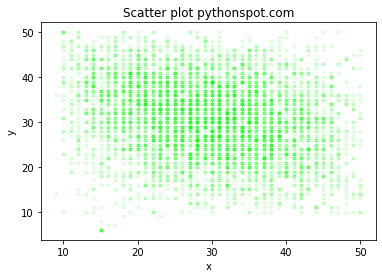

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x = total_extraversion
y = total_neuroticism
colors = (0,1,0)
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.1)
plt.title('Scatter plot of the scores between extraversion and neuroticism')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
df_fraction['Extraversion Scores (Min=20, Max=50)'].describe()

count    5076.000000
mean       29.422577
std         9.123008
min         9.000000
25%        22.750000
50%        29.000000
75%        36.000000
max        50.000000
Name: Extraversion Scores (Min=20, Max=50), dtype: float64

In [ ]:
df_fraction['Neuroticism Scores (Min=20, Max=50)'].describe()

count    5076.000000
mean       30.733846
std         8.501909
min         6.000000
25%        25.000000
50%        31.000000
75%        37.000000
max        50.000000
Name: Neuroticism Scores (Min=20, Max=50), dtype: float64

In [ ]:
df_fraction['Agreeableness Scores (Min=20, Max=50)'].describe()

count    5076.000000
mean       37.780733
std         7.271687
min        10.000000
25%        34.000000
50%        39.000000
75%        43.000000
max        50.000000
Name: Agreeableness Scores (Min=20, Max=50), dtype: float64

In [ ]:
df_fraction['Conscientiousness Scores (Min=20, Max=50)'].describe()

count    5076.000000
mean       33.383176
std         7.387324
min         9.000000
25%        28.000000
50%        33.000000
75%        39.000000
max        50.000000
Name: Conscientiousness Scores (Min=20, Max=50), dtype: float64

In [ ]:
df_fraction['Oppeness Scores (Min=20, Max=50)'].describe()

count    5076.000000
mean       38.242711
std         6.374904
min         9.000000
25%        34.000000
50%        39.000000
75%        43.000000
max        50.000000
Name: Oppeness Scores (Min=20, Max=50), dtype: float64

## 6. Results/Data/Findings <a class="anchor" id="Results"></a>
- The answer most frequently occuring as 5.0 from the first 50 questions is OPN9 at 456735 and the least likely to be answered as 5.0 is OPN4 at 33235.
- The question of OPN9 is 'I spend time reflecting on things' and the question for OPN4 is 'I am not interested in abstract ideas'.
- A high score in OPN9 and a low score in OPN4 both increase the score of Openness due to OPN4 being reversed.
- The highest mean score in all of the types is openness at 38.
- The lowest mean score in all of the types is extraversion at 29.
- The question most frequently answered as 5 is OPN4 "I spend time reflecting on things."
- The question least frequently answered as 5 is OPN9 "I am not interested in abstract ideas."



# 6. Discussion <a class="anchor" id="Discussion"></a>

Discussion
- It's often said that people in general tend to be above average in agreeableness and this is reflected within the results.
- The highest average score being oppeness could be a result of the fact that the people that tend to take online tests such as this one willingly are much more likely to have higher oppeness due to the curiosity and creativity factor. This can also be seen with the question most and least frequently answered 5 are two oppeness questions both of which boost oppeness scores.
- The lowest average score being extraversion could be the result of more introverted types valuing their free time to themselves, resulting in a lot more time spent online and eventually coming across this test.
- The high oppeness score could also be a result of the questions generally asking desirable traits to have which people naturally don't want to rank themselves low on. For other traits this doesn't apply too much with questions like "I make friends easily" being pretty easy to see.
-It could be that the first 5076 people to take the test are not representative of the over 1 million much less the entire population however I still think the results are as I imagined with highly open and introverted people taking the test.



# 7. Conclusion <a class="anchor" id="Conclusion"></a>
- The highest trait of people willing to take tests online is most likely oppeness and the lowest is extraversion.
- People that took the test like to label themselves as reflecting on things and generally have a bigger interest in abstract ideas compared to any other question.

# 8. Reference List/Bibliography <a class="anchor" id="Reference"></a>

- List full details for any works you have referred to in the report.
- For the correct style of referencing to use, check college guidelines.  
- If you are uncertain about how or when to reference, see the college library referencing guide.
